In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense 
from tensorflow.keras import Model 

In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from xgboost import XGBClassifier

In [4]:
df = pd.read_csv('creditcard_2023.csv')

In [5]:
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [7]:
df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

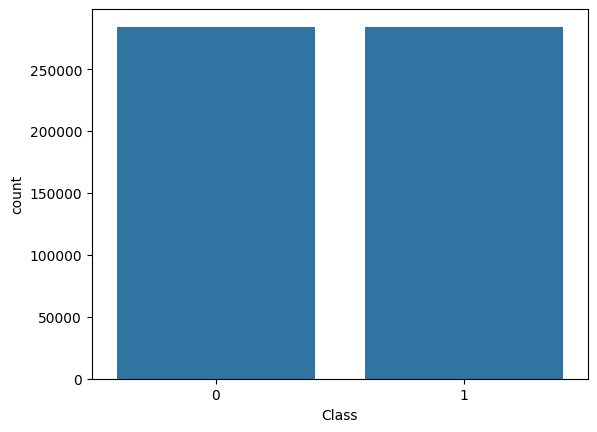

Class
0    284315
1    284315
Name: count, dtype: int64


In [8]:
sns.countplot(data = df, x = 'Class')
plt.show()
print(df['Class'].value_counts())

In [9]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [10]:
df.groupby(by = 'Class')['Amount'].mean()

Class
0    12026.313506
1    12057.601763
Name: Amount, dtype: float64

In [11]:
df.nunique()

id        568630
V1        552035
V2        552035
V3        552035
V4        552035
V5        552035
V6        552035
V7        552035
V8        552035
V9        552035
V10       552035
V11       552035
V12       552035
V13       552035
V14       552035
V15       552035
V16       552035
V17       552035
V18       552035
V19       552035
V20       552035
V21       552035
V22       552035
V23       552035
V24       552035
V25       552035
V26       552035
V27       552035
V28       552035
Amount    506485
Class          2
dtype: int64

In [12]:
df.drop('id', axis = 1, inplace = True)

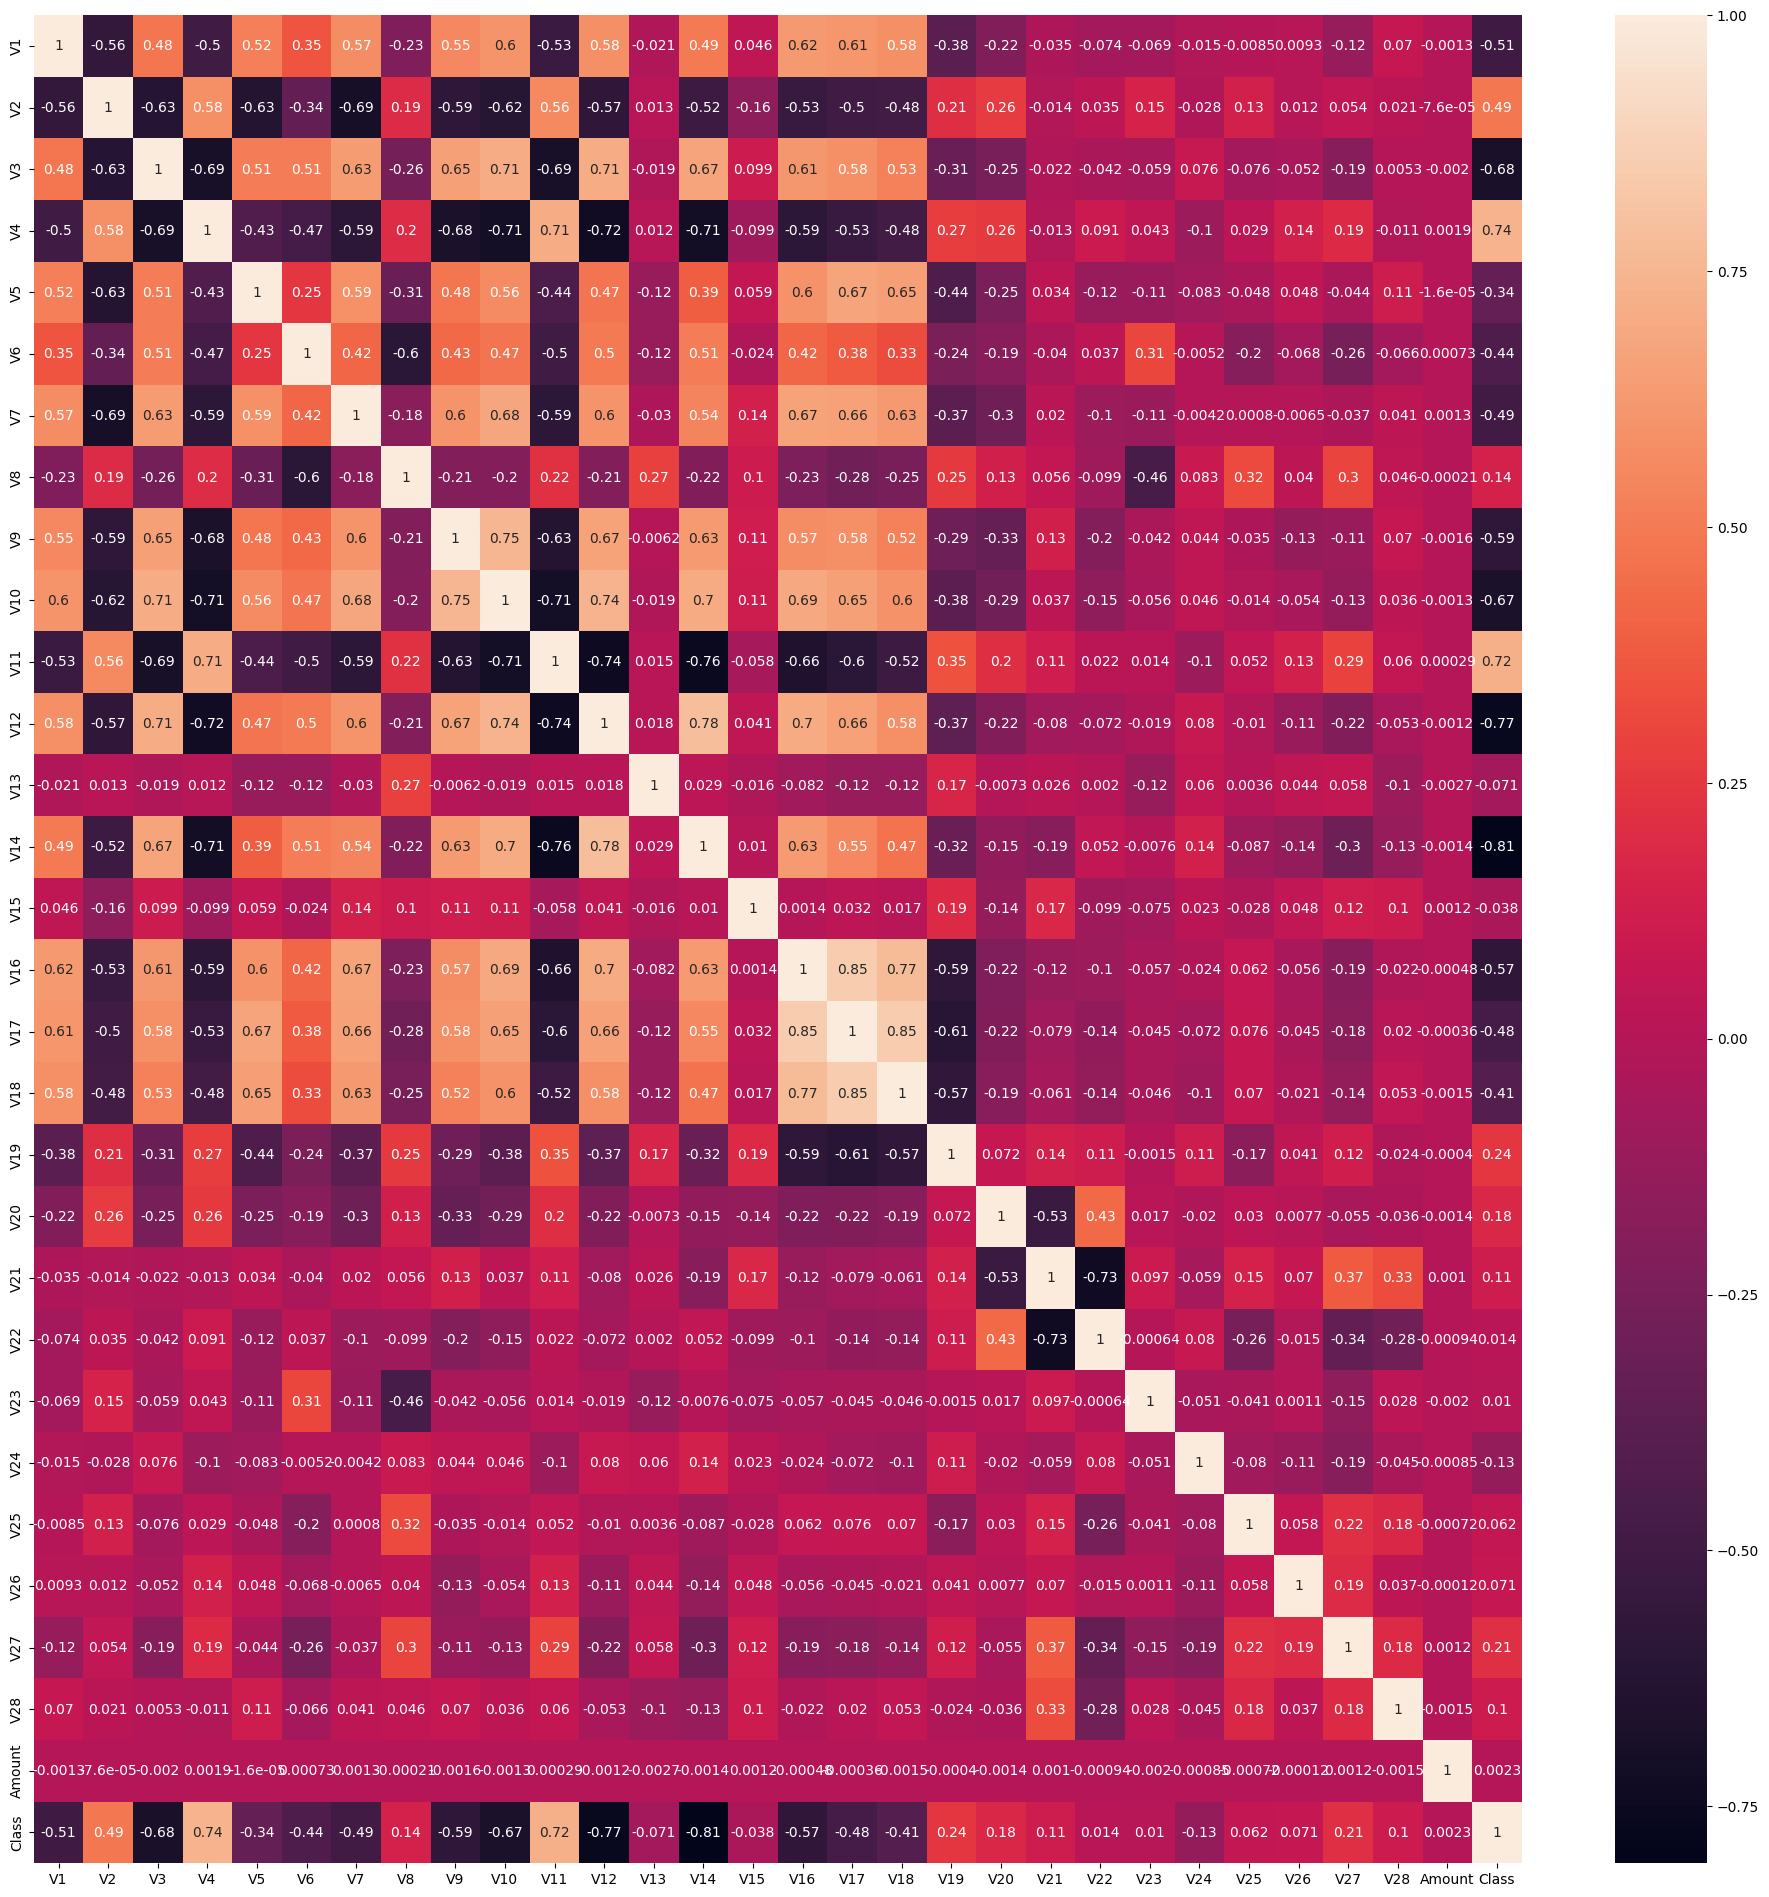

In [15]:
plt.figure(figsize=(24,24))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [19]:
for column in df.select_dtypes(include='float64').columns:
    print("{}: {}".format(column,df[column].var()), '\n')

V1: 1.0000017586158982 

V2: 1.0000017586158991 

V3: 1.0000017586158987 

V4: 1.0000017586158991 

V5: 1.000001758615899 

V6: 1.0000017586158993 

V7: 1.000001758615898 

V8: 1.0000017586158996 

V9: 1.0000017586158987 

V10: 1.000001758615899 

V11: 1.0000017586158991 

V12: 1.0000017586158987 

V13: 1.0000017586158993 

V14: 1.0000017586158985 

V15: 1.0000017586158991 

V16: 1.0000017586158993 

V17: 1.000001758615899 

V18: 1.0000017586158987 

V19: 1.0000017586158991 

V20: 1.0000017586158987 

V21: 1.0000017586158991 

V22: 1.000001758615899 

V23: 1.000001758615899 

V24: 1.0000017586158996 

V25: 1.0000017586158993 

V26: 1.000001758615899 

V27: 1.0000017586158991 

V28: 1.0000017586158998 

Amount: 47881479.30651612 



In [20]:
for column in df.select_dtypes(include='float64').columns:
    print("{}: {}".format(column,df[column].mean()), '\n')

V1: -5.638057829783114e-17 

V2: -1.3195454495237075e-16 

V3: -3.518787865396553e-17 

V4: -2.879008253506271e-17 

V5: 7.99724514862853e-18 

V6: -3.958636348571122e-17 

V7: -3.198898059451412e-17 

V8: 2.1092734079507747e-17 

V9: 3.998622574314265e-17 

V10: 1.9913140420085041e-16 

V11: -1.1835922819970225e-16 

V12: -5.758016507012542e-17 

V13: -5.698037168397828e-18 

V14: -4.07859502580055e-17 

V15: 2.6490874554832007e-17 

V16: -1.719407706955134e-17 

V17: -3.398829188167125e-17 

V18: -5.837988958498827e-17 

V19: 2.4791459960748445e-17 

V20: -1.5794559168541347e-17 

V21: 4.758360863433976e-17 

V22: 3.948639792135337e-18 

V23: 6.194741066300928e-18 

V24: -2.7990358020199858e-18 

V25: -3.178904946579841e-17 

V26: -7.497417326839247e-18 

V27: -3.5987603168828385e-17 

V28: 2.609101229740058e-17 

Amount: 12041.957634577848 



In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler_data = scaler.fit_transform(df.select_dtypes(include='float64'))

scaler_df = pd.DataFrame(scaler_data, columns = df.select_dtypes(include='float64').columns)

In [47]:
from sklearn.decomposition import PCA

pca = PCA(n_components=9)

pca_data = pca.fit(scaler_df)

print(pca.components_)

[[ 2.30352689e-01 -2.34128501e-01  2.58934987e-01 -2.53161229e-01
   2.22798979e-01  1.87258653e-01  2.54266186e-01 -1.13508994e-01
   2.52208584e-01  2.75169354e-01 -2.61035603e-01  2.71003250e-01
  -2.47002818e-02  2.52647479e-01  2.36012578e-02  2.71682400e-01
   2.66205608e-01  2.46257316e-01 -1.67740693e-01 -1.04499773e-01
  -1.15956689e-02 -3.69656496e-02 -9.78057604e-03  8.66261305e-03
  -1.41850480e-02 -2.98706293e-02 -7.54449045e-02  1.24152849e-03
  -2.96122585e-04]
 [ 3.55200290e-02 -4.84289286e-02 -1.80941890e-02  2.90373287e-03
   9.36601348e-02 -1.58613592e-01  8.42644302e-02  2.00952171e-01
   8.62558016e-02  5.16890019e-02  8.11606350e-02 -4.20362499e-02
   3.58465430e-02 -1.39310112e-01  1.67749880e-01 -1.44651716e-03
   2.94900657e-02  4.66640897e-02  1.03731488e-02 -2.87424369e-01
   4.79323346e-01 -4.72558896e-01 -1.14039474e-01 -1.03456605e-01
   2.37855077e-01  1.10281051e-01  3.73883248e-01  2.76186673e-01
   8.56939889e-04]
 [ 2.47068286e-02 -1.17698620e-01  5.6

In [48]:
print(pca.explained_variance_ratio_)

[0.33872158 0.09688719 0.06618997 0.06346626 0.04459281 0.03666176
 0.03459288 0.03441219 0.02999143]


In [51]:
pca_tranformed = pca.transform(scaler_df)

pca_df = pd.DataFrame(pca_tranformed, columns = ["PC_" + str(i+1) for i in range(9)])

In [52]:
pca_df

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9
0,2.190569,-0.164082,0.263166,0.911449,0.490570,-1.352294,-0.088032,-1.172321,-0.753017
1,2.085246,0.354983,0.169414,0.019958,0.124245,0.632589,-0.891875,0.287900,-0.293445
2,2.283198,-0.522385,-0.361671,0.380808,1.141351,-0.146200,-1.809982,0.291966,-1.542024
3,2.694944,0.107419,-0.256137,-1.141607,-0.684354,1.160975,-0.829877,0.523334,-1.477913
4,2.048884,-0.354252,0.936553,0.978670,0.597481,0.898894,-0.767472,-1.032805,0.617498
...,...,...,...,...,...,...,...,...,...
568625,-4.169072,1.382730,-1.497886,0.747923,1.316110,-0.163377,-1.477693,0.202790,-1.483360
568626,-0.744048,0.385549,-0.382559,0.564713,1.286802,0.106035,-1.615696,0.104031,0.875951
568627,-0.698403,-0.319784,-0.269427,-0.138708,-0.227382,-0.518434,1.310631,-1.089157,-0.696165
568628,1.358058,0.230246,0.270591,-0.505728,-0.066985,-0.610765,0.300375,0.604925,-1.214560


In [53]:
df = pd.concat([df['Class'], pca_df], axis = 1)

In [54]:
df.isnull().sum()

Class    0
PC_1     0
PC_2     0
PC_3     0
PC_4     0
PC_5     0
PC_6     0
PC_7     0
PC_8     0
PC_9     0
dtype: int64

In [55]:
x = df.drop('Class', axis =1 )

y = df['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=.20, random_state=7)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape )

(454904, 9) (454904,) (113726, 9) (113726,)


Baseline Logistic Regression: 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95    227378
           1       0.98      0.92      0.95    227526

    accuracy                           0.95    454904
   macro avg       0.95      0.95      0.95    454904
weighted avg       0.95      0.95      0.95    454904
 
 Baseline Logistic Regression CM matrix: 
 Axes(0.125,0.11;0.62x0.77)


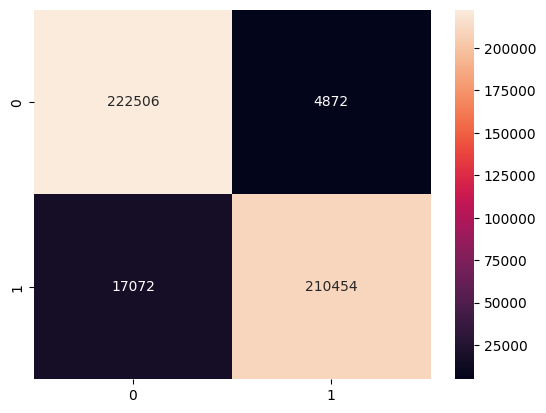

In [62]:
base_logit = LogisticRegression()

base_logit.fit(x_train, y_train)

base_logit_predict_train = base_logit.predict(x_train)

base_logit_cr_train = classification_report(y_train, base_logit_predict_train)

base_logit_cm_train = sns.heatmap(confusion_matrix(y_train, base_logit_predict_train), annot= True, fmt= ".0f" )

print("Baseline Logistic Regression:", '\n',(base_logit_cr_train),'\n', "Baseline Logistic Regression CM matrix:",'\n', base_logit_cm_train )


Baseline Logistic Regression: 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     56937
           1       0.98      0.92      0.95     56789

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726
 
 Baseline Logistic Regression CM matrix: 
 Axes(0.125,0.11;0.62x0.77)


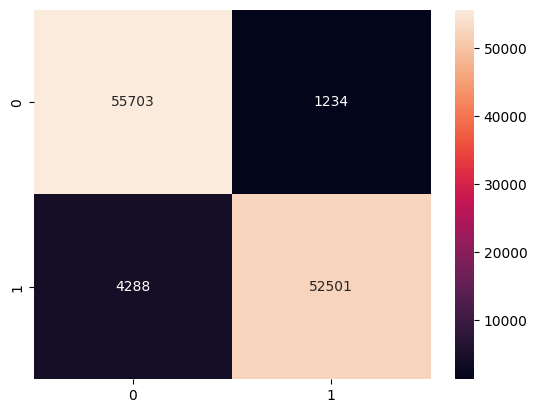

In [63]:
base_logit_predict_test = base_logit.predict(x_test)

base_logit_cr_test = classification_report(y_test, base_logit_predict_test)

base_logit_cm_test = sns.heatmap(confusion_matrix(y_test, base_logit_predict_test), annot= True, fmt= ".0f" )

print("Baseline Logistic Regression:", '\n',(base_logit_cr_test),'\n', "Baseline Logistic Regression CM matrix:",'\n', base_logit_cm_test )

Baseline Random Forest: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227378
           1       1.00      1.00      1.00    227526

    accuracy                           1.00    454904
   macro avg       1.00      1.00      1.00    454904
weighted avg       1.00      1.00      1.00    454904
 Baseline Random Forest CM Matrix: 
 Axes(0.125,0.11;0.62x0.77)


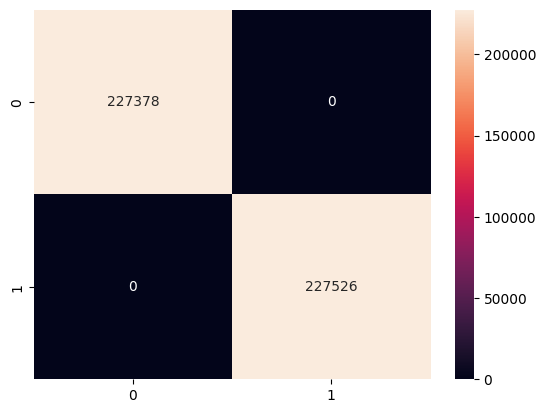

In [64]:
base_rf = RandomForestClassifier()

base_rf.fit(x_train, y_train)

base_rf_predict_train = base_rf.predict(x_train)

base_rf_cr_train = classification_report(y_train, base_rf_predict_train)

base_rf_cm_train = sns.heatmap(confusion_matrix(y_train, base_rf_predict_train), annot=True, fmt= ".0f")

print("Baseline Random Forest:", '\n', base_rf_cr_train, "Baseline Random Forest CM Matrix:", '\n', base_rf_cm_train)

Baseline Random Forest: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56937
           1       1.00      1.00      1.00     56789

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726
 Baseline Random Forest CM Matrix: 
 Axes(0.125,0.11;0.62x0.77)


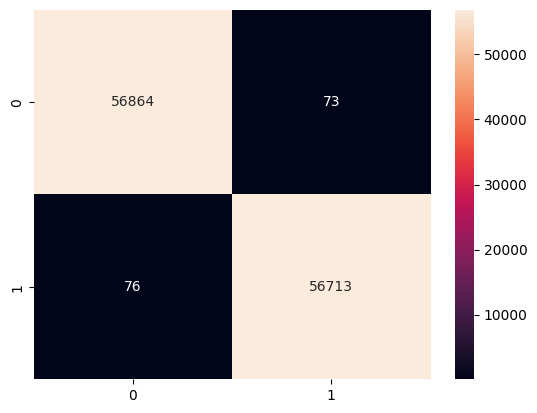

In [65]:
base_rf_predict_test = base_rf.predict(x_test)

base_rf_cr_test = classification_report(y_test, base_rf_predict_test)

base_rf_cm_test = sns.heatmap(confusion_matrix(y_test, base_rf_predict_test), annot=True, fmt= ".0f")

print("Baseline Random Forest:", '\n', base_rf_cr_test, "Baseline Random Forest CM Matrix:", '\n', base_rf_cm_test)